In [ ]:
BUSINESS UNDERSTANDING


The main goal is to analyze and predict the risks associated with purchasing and operating airplanes for both commercial and private enterprises, as part of my company's new diversification strategy.

In [ ]:
PROBLEM STATEMENT

The goal of this analysis is to examine the AviationData dataset to identify key factors influencing the viability of a project focused on aircraft operations. Specifically, I will assess the risks associated with airplane accidents and the survival rates following such incidents.

In [ ]:
OBJECTIVES

In [ ]:
1.Investigate the relationship between engine type and the frequency of accidents.
2.Examine the correlation between the number of engines per aircraft and the recorded number of accidents.
3.Identify and analyze key factors that contribute to aircraft accidents, such as weather conditions and amateur-built aircraft.
4.Develop visualizations to effectively communicate the insights and findings derived from the analysis.

In [ ]:
REASEARCH QUESTIONS

In [ ]:
1.What are the key aircraft characteristics that impact the likelihood of an accident?
2.Does the country of operation play a significant role in determining the probability of an airplane accident?
3.How does the phase of flight affect the survival rate in the event of an aircraft accident?

In [58]:
#Importing essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

DATA UNDERSTANDING

In [57]:
#Loading the aviation dataset from a CSV file into a pandas DataFrame and checking the top columns
import csv
Aviation_data = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
Aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#Chack the last 5 Columns
Aviation_data.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [7]:
# To get the summary information about the dataset
Aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [8]:
#To get statistics for the numerical columns in the dataset
Aviation_data.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [9]:
#To get the Column names
print(list(Aviation_data.columns))

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date']


In [ ]:
MISSING DATA

In [10]:
# Check for missing values in the 'Aviation_data' DataFrame
# identify which columns have missing data and how many missing values each column has.
Aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [19]:
# Fill missing values (NaN) in specific columns of the 'Aviation_data' DataFrame
# Set missing values to 0
Aviation_data = Aviation_data.fillna({'Total.Fatal.Injuries': 0, 'Total.Serious.Injuries':0, 'Total.Minor.Injuries':0, 'Total.Uninjured':0, 'Number.of.Engines':0})

In [20]:
#Replacing missing values in the Aircraft damage/Phase of flight column
Aviation_data = Aviation_data.fillna({'Aircraft.damage': 'Unknown', 'Broad.phase.of.flight': 'Unknown'})

In [56]:
#Additional replacement of missing values
Aviation_data = Aviation_data.fillna({'Country': 'Undefined', 'Location': 'Unknown', 'Injury.Severity': 'Unknown', 'Model': 0, 'Make': 'Unknown', 'Purpose.of.flight': 'Unknown', 'Engine.Type': 'Unknown','Amateur.Built': 'Undefined', 'Weather.Condition': 'Unknown',})

In [22]:
#Additional replacement of missing values
Aviation_data = Aviation_data.fillna({'Country': 'Undefined', 'Location': 'Unknown', 'Injury.Severity': 'Unknown', 'Model': 0, 'Make': 'Unknown', 'Purpose.of.flight': 'Unknown', 'Engine.Type': 'Unknown','Amateur.Built': 'Undefined', 'Weather.Condition': 'Unknown',})

In [23]:
# Check the column names before dropping
print("Original Columns:", Aviation_data.columns) 

# Dropping unnecessary columns with missing data, while ignoring errors for non-existent columns
Aviation_data = Aviation_data.drop(
    ['Aircraft.Category', 'Latitude', 'Longitude', 'Airport.Code', 'FAR.Description', 'Air.carrier', 'Schedule'],
    axis=1, 
    errors='ignore'
)

# Display the remaining columns after dropping
print("Updated Columns:", Aviation_data.columns)


Original Columns: Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')
Updated Columns: Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injur

In [24]:
Aviation_data.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Name              36185
Injury.Severity               0
Aircraft.damage               0
Registration.Number        1382
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              6384
Publication.Date          13771
dtype: int64

Handling Missing Data

In [55]:
#Check if we have duplicated data
Aviation_data.duplicated().sum()

0

In [26]:
#Check the shape of the data
Aviation_data.shape

(88889, 24)

DATA ANALYSIS

1.Bar Graph - Engene vs Accidents

In [41]:
#Get asummary table showing the count of rows (accidents or events) for each engine type
Summary_data1 = Aviation_data.pivot_table(aggfunc='size', index='Engine.Type', fill_value=0)
print(Summary_data1)

Engine.Type
Electric              10
Geared Turbofan       12
Hybrid Rocket          1
LR                     2
NONE                   2
Reciprocating      69530
Turbo Fan           2481
Turbo Jet            703
Turbo Prop          3391
Turbo Shaft         3609
UNK                    1
Unknown             2051
dtype: int64


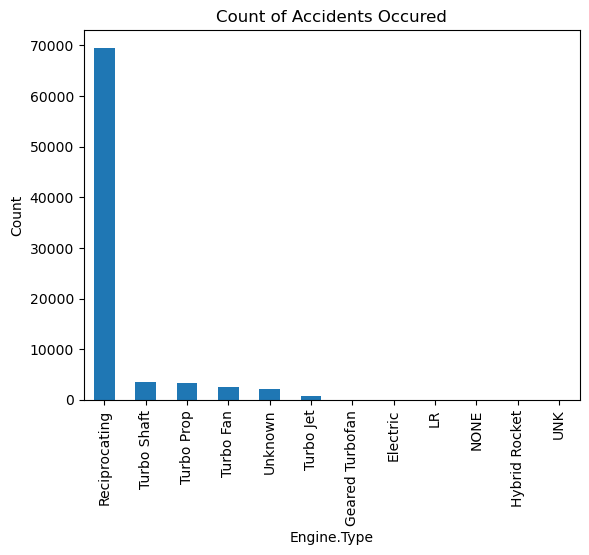

In [46]:
Aviation_data['Engine.Type'].value_counts().plot(kind='bar')
plt.title('Count of Accidents Occured')
plt.xlabel('Engine.Type')
plt.ylabel('Count')
plt.show()

2.BAR GRAPH : ACCIDENTS FREQUENCY VS WEATHER

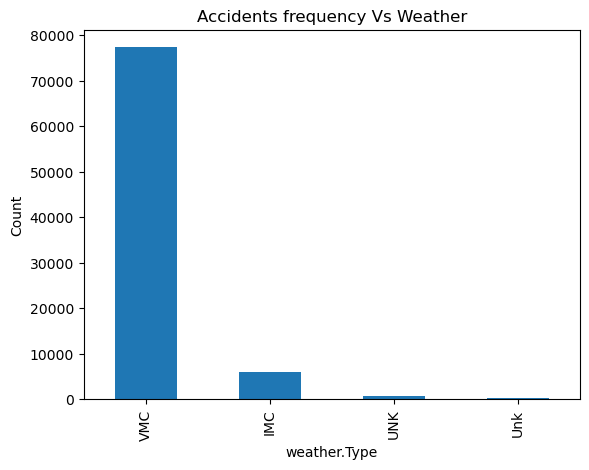

In [51]:
Aviation_data['Weather.Condition'].value_counts().plot(kind='bar')
plt.title('Accidents frequency Vs Weather')
plt.xlabel('weather.Type')
plt.ylabel('Count')
plt.show()

3 .Pie Chart - Injuries Visuals

In [28]:
#Get total counts for fatal injuries, uninjured passengers, serious injuries, and minor injuries across all records.
Aviation_data_selected = Aviation_data[['Total.Fatal.Injuries', 'Total.Uninjured', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].sum()

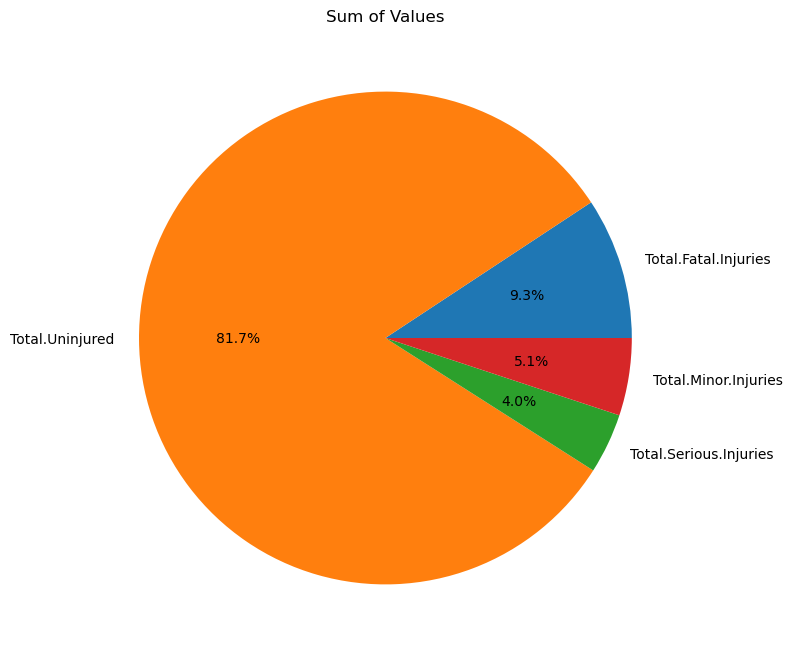

In [46]:
Aviation_data_selected.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Sum of Values")
plt.ylabel('')  # Hide the y label
plt.show()

4.Line Graph -Accidents per Year 

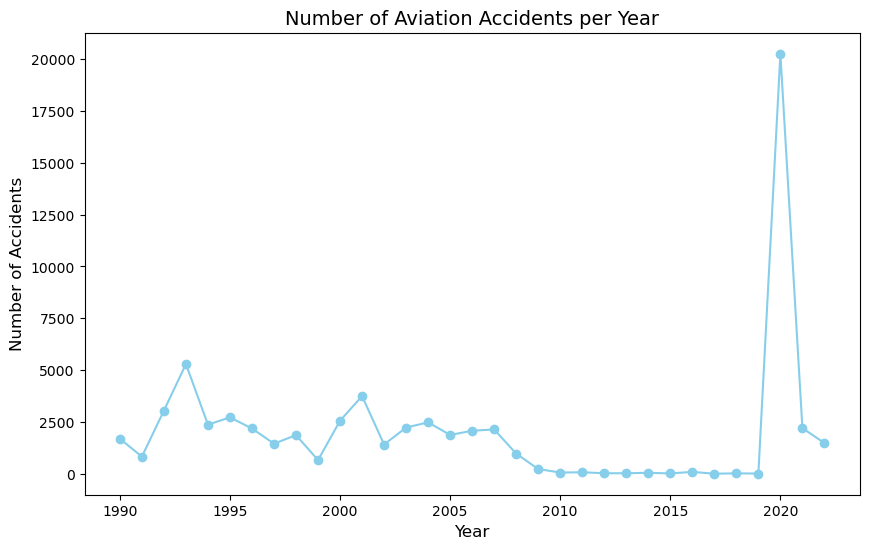

In [53]:
# Compare the incidents Year to year from 1990 to 2022 in a bar chart

Aviation_data['Publication.Date'] = pd.to_datetime(Aviation_data['Publication.Date'], errors='coerce')

# Extract the year from the 'Event.Date' column
Aviation_data['Year'] = Aviation_data['Publication.Date'].dt.year

# Filter the data to only include incidents from 1980 to 2022
Aviation_data_filtered = Aviation_data[(Aviation_data['Year'] >= 1990) & (Aviation_data['Year'] <= 2022)]

# Group the data by year and count the number of incidents per year
Grouped_by_Year = Aviation_data_filtered.groupby('Year').size()

# Plot the incidents per year as a line chart
Grouped_by_Year.plot(kind='line', color='skyblue', marker='o', figsize=(10, 6))

# Generating Visuals
plt.title('Number of Aviation Accidents per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)

# Show the plot
plt.show()


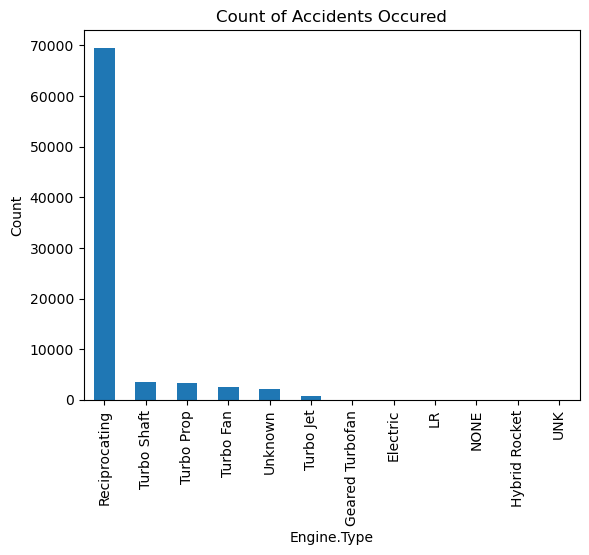

In [68]:
Aviation_data['Engine.Type'].value_counts().plot(kind='bar')
plt.title('Count of Accidents Occured')
plt.xlabel('Engine.Type')
plt.ylabel('Count')
plt.show()

DATA LIMITATION

Reporting StandardS Variations
1. Countries like the United States likely to have with better accident reporting mechanisms
   and by extenssion shall report relatively more accidents

2. Unavailability of the volumes of air traffic data
    Countries like the united states shall have more incidents compared to countries like
    kenya because of the volumes they have. The high incidents does not reflect risks level

3. Pilot details
    It would be intresting to see the correlation between the the pilots years of experience
    and the incidents

4. Historical data such as Conditions of the planes not available including year of manufacturing and 
    other mechanical issues
    

RECOMMENDATIONS

1.Address Weather-Related Risks:
There is direct correlation between the weather and accidents as per chart 2 above
The weather related accidents triggers majorly caused by 
a.Ineffective weather monitoring systems
b.Pilot trainings and prior experience piloting in adverse weather

2.Fatal Injuries
 92% of the accidents are in the United states.
 The high percentage calls forstricter enforcement of maintenance and operational guidelines

 3.study and Trainings: 
 Countries with many minor or non-fatal accidents to be used for targeted
 pilot training and enhanced preventive measures.

 4.Engene type
 Reciprocating engenes is is not reliable.Relative to the other types of engene its more likely to be invoved 
 in an accidents.
 Makes up 84% of all the recorded incidents

 5.Risk factor

 97% of the planes irrespective of the make is either completey destrored or substantialy destroyed.
 The company should focus extensively on prevention mechanism otherwise it could record huge losses


